In [1]:
import cv2
import json
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import re

In [3]:
with open ('name.json','r') as f:
  name_vn= json.load(f)


def get_commune(path: str = "./commune_list.pkl"):
    with open("./commune_list.pkl", "rb") as f:
        commune_list = pickle.load(f)

    commune_list = list(commune_list.values())
    return commune_list


commune_list = get_commune()


def get_location(commune_list: list) -> str:
    num = np.random.randint(0, len(commune_list) - 1)
    out = commune_list[num]
    while re.match("KCN", out[0]) or re.match("CCN", out[0]):
        num = np.random.randint(0, len(commune_list) - 1)
        out = commune_list[num]
    return out

# Ngày sinh từ 1/1/1940 đến 31/12/2006
date_range = pd.date_range(start="1940-01-01", end="2006-12-31")

def generate_birth_date():
    date = np.random.choice(date_range)
    date = pd.to_datetime(date)
    return date.strftime("%d-%m-%Y")

def generate_name_by_gender(key: str):
    family_name = np.random.choice(name_vn['Họ'])
    # middle_name = np.random.choice(middle_names[key])
    personal_name = np.random.choice(name_vn[key])
    return " ".join([family_name, personal_name]).upper()

def puttext(img,label, address):
    text=' '
    if (np.random.rand(1)>0.9)[0]:
        Domicile=get_location(commune_list)
    else:
        Domicile=address
    print(Domicile, address)

    fontpath = "./arial.ttf"     
    font = ImageFont.truetype(fontpath, 24)
    
    if label=='ID':
        text="{0}".format(np.random.randint(100000000, 999999999))
    elif label =='Name':
        text=generate_name_by_gender(key=np.random.choice(['Nam','Nữ']))
    elif label == 'Bdate':
        text=generate_birth_date()

    elif label== 'Address':
        text=str(address[0])
    elif label== 'Address1':
        text=f'{address[1]}, {address[2]}'
    elif label== 'Domicile':
        text=str(Domicile[0])
    elif label== 'Domicile1':
        text=f'{Domicile[1]}, {Domicile[2]}'


    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x2, y2),  text, font = font, fill = (0, 0, 0, 0))
    img = np.array(img_pil)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img


In [2]:
pwd

'/media/huy/DATA/huynv/git/nvh/labeling/gen_cmt'

In [4]:
text=f'{get_location(commune_list)[1]}, {get_location(commune_list)[2]}'
text


'Hà Tiên, Quảng Ninh'

In [5]:
print('Bdate: ', generate_birth_date())
print('Adress: ', get_location(commune_list))
print('Name: ', generate_name_by_gender(key=np.random.choice(['Nam','Nữ'])))
print('ID: ', "{0}".format(np.random.randint(100000000, 999999999)))

Bdate:  19-10-1957
Adress:  ('Sơn Giang', 'Phước Long', 'Bình Phước')
Name:  NGUYỄN THỤY MIÊN
ID:  769362009


In [6]:
with open ('form.json', 'r') as f:
    df= json.load(f)

In [7]:
df

[{'image': '/data/upload/2/d22ad62b-form.jpg',
  'id': 22,
  'label': [{'x': 57.03125,
    'y': 26,
    'width': 20.625,
    'height': 5.25,
    'rotation': 0,
    'rectanglelabels': ['ID'],
    'original_width': 640,
    'original_height': 400},
   {'x': 49.375,
    'y': 35.5,
    'width': 35.15625,
    'height': 5.5,
    'rotation': 0,
    'rectanglelabels': ['Name'],
    'original_width': 640,
    'original_height': 400},
   {'x': 49.6875,
    'y': 44.25,
    'width': 36.40625,
    'height': 5.75,
    'rotation': 0,
    'rectanglelabels': ['Name1'],
    'original_width': 640,
    'original_height': 400},
   {'x': 56.09375,
    'y': 54,
    'width': 25,
    'height': 5,
    'rotation': 0,
    'rectanglelabels': ['Bdate'],
    'original_width': 640,
    'original_height': 400},
   {'x': 60.468750000000014,
    'y': 62,
    'width': 26.718750000000007,
    'height': 6.25,
    'rotation': 0,
    'rectanglelabels': ['Domicile'],
    'original_width': 640,
    'original_height': 400},
   

In [8]:
df[0]['label'][0]

{'x': 57.03125,
 'y': 26,
 'width': 20.625,
 'height': 5.25,
 'rotation': 0,
 'rectanglelabels': ['ID'],
 'original_width': 640,
 'original_height': 400}

In [9]:
from PIL import ImageFont, ImageDraw, Image
img= cv2.imread('form.jpg')
# img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

address=get_location(commune_list)
for i in range(len(df[0]['label'])):
    label=df[0]['label'][i]['rectanglelabels'][0]
    x2=int(df[0]['label'][i]['original_width']*df[0]['label'][i]['x']/100)
    x1=int(df[0]['label'][i]['original_width']*(df[0]['label'][i]['x']+df[0]['label'][i]['width'])/100)
    y2=int((df[0]['label'][i]['original_height']*df[0]['label'][i]['y']/100))
    y1=int((df[0]['label'][i]['original_height']*(df[0]['label'][i]['y']+df[0]['label'][i]['height'])/100))
    # img=cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
    
    img= puttext(img,label, address)
    # if lalbel=='ID':
    
        
#     # img[y2:y1,x2:x1]=255
#     print(x1,x2,y1,y2)


('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')
('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận') ('Mỹ Sơn', 'Ninh Sơn', 'Ninh Thuận')


In [10]:
# font = cv2.FONT_HERSHEY_SIMPLEX
  
# # org
# org = (50, 50)
  
# # fontScale
# fontScale = 1
   
# # Blue color in BGR
# color = (255, 0, 0)
  
# # Line thickness of 2 px
# thickness = 2
   
# # Using cv2.putText() method
# image = cv2.putText(img, 'OpenCV', org, font, 
#                    fontScale, color, thickness, cv2.LINE_AA)

True

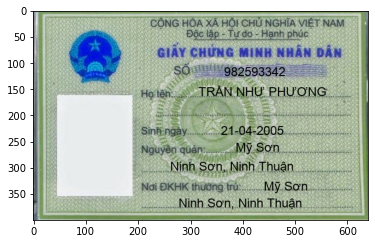

In [11]:

plt.imshow(img)
cv2.imwrite('gen_cmt.jpg',img)

In [273]:
with open ('name.json','r') as f:
  name_vn= json.load(f)


def get_commune(path: str = "./commune_list.pkl"):
    with open("./commune_list.pkl", "rb") as f:
        commune_list = pickle.load(f)

    commune_list = list(commune_list.values())
    return commune_list
commune_list = get_commune()

def get_location(commune_list: list) -> str:
    num = np.random.randint(0, len(commune_list) - 1)
    out = commune_list[num]
    while re.match("KCN", out[0]) or re.match("CCN", out[0]):
        num = np.random.randint(0, len(commune_list) - 1)
        out = commune_list[num]
    return out

def generate_name_by_gender(key: str):
    family_name = np.random.choice(name_vn['Họ'])
    # middle_name = np.random.choice(middle_names[key])
    personal_name = np.random.choice(name_vn[key])
    return " ".join([family_name, personal_name])


# Ngày sinh từ 1/1/1940 đến 31/12/2006
date_range = pd.date_range(start="1940-01-01", end="2006-12-31")

def generate_birth_date():
    date = np.random.choice(date_range)
    date = pd.to_datetime(date)
    return date.strftime("%d/%m/%Y")